In [18]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
import time
%matplotlib notebook

In [19]:
def pshift(a, s):
    """
    A convenience function that translate peridically array `a` to bring point `s = (i, j)` at the origin. 
    """
    return np.roll(np.roll(a, s[0], axis=0), s[1], axis=1)

def cc(b, t):
    """
    Return the cross-correlation between base image `b` and template image `t`.
    """
    return np.fft.ifftn( np.fft.fftn(b) * np.fft.fftn(t).conj() ).real

In [20]:
# Load images    
image_list = [imageio.imread('./images/flower_{0:02d}.png'.format(i)).astype(float) for i in range(32)]

<IPython.core.display.Javascript object>


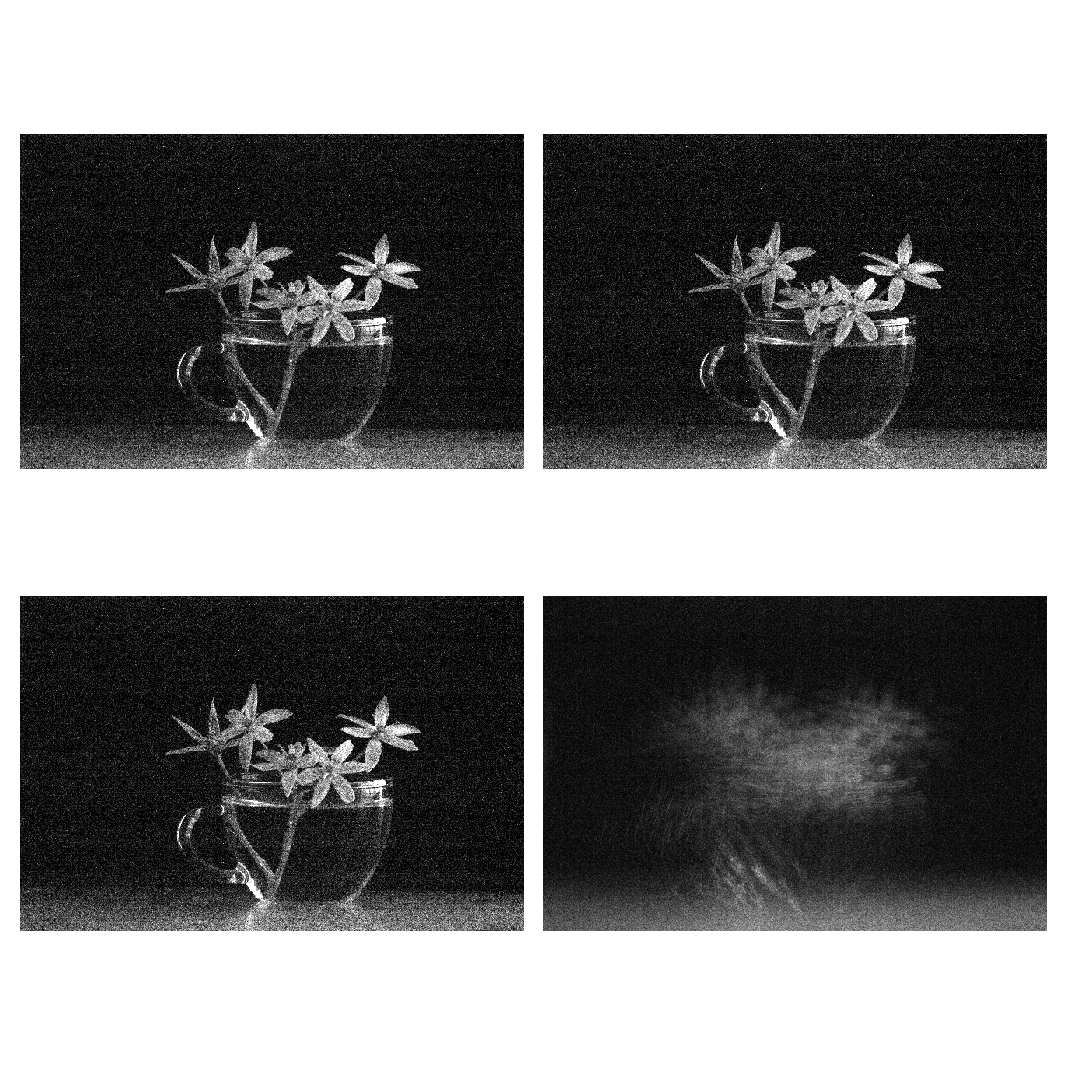

In [32]:
# Compute first object estimate
obj = np.array(image_list).mean(axis=0)
plt.gray()
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1.imshow(image_list[0], vmax=30.)
ax1.axis('off')
ax2.imshow(image_list[0], vmax=30.)
ax2.axis('off')
ax3.imshow(image_list[0], vmax=30.)
ax3.axis('off')
ax4.imshow(obj, vmax=30.)
ax4.axis('off')
fig.tight_layout()

<IPython.core.display.Javascript object>


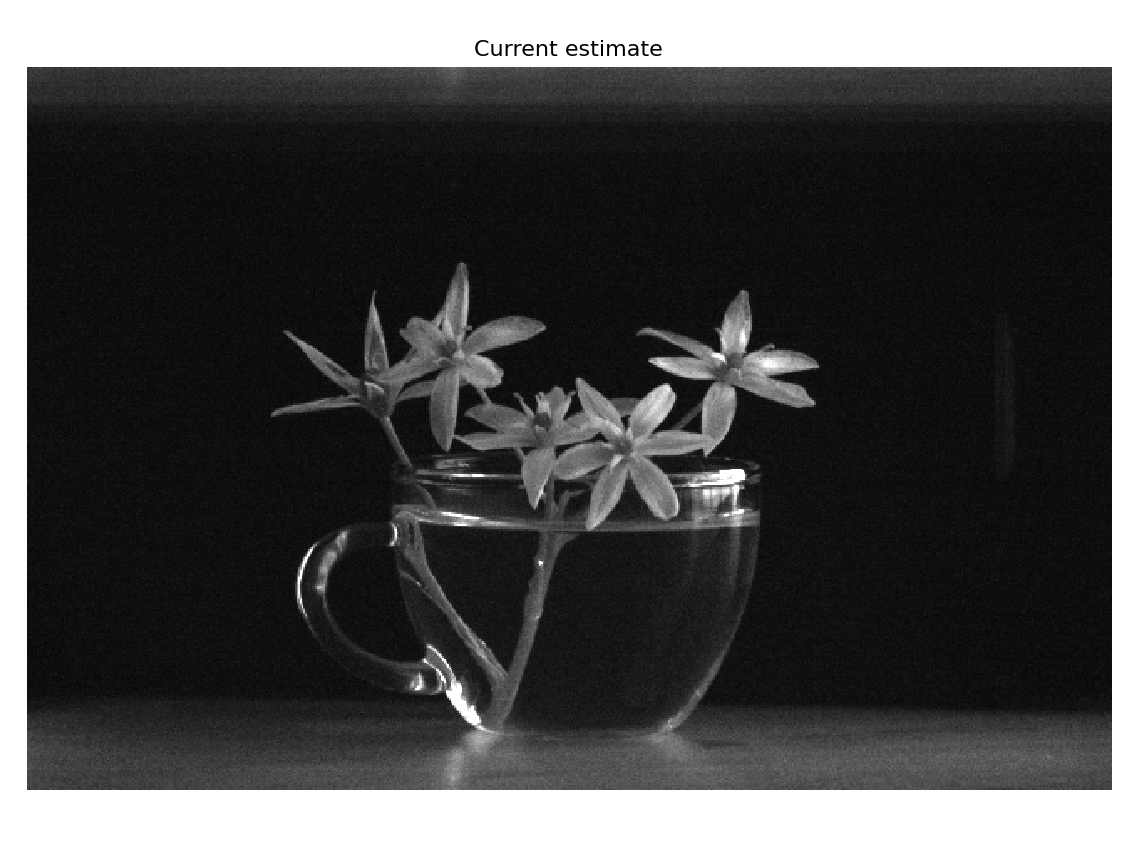

In [33]:
fig, ax = plt.subplots()
imgobj = ax.imshow(obj, vmax=35., cmap='gray')
ax.set_title('Current estimate')
ax.axis('off')
fig.tight_layout()

In [34]:
# Initialize image shifts
shifts = np.zeros((32,2), dtype=int)

stop = False
# Loop
for iloop in range(10):
    if stop: break

    # estimate the shifts
    old_shifts = shifts.copy()
    for k,image in enumerate(image_list):
        # Compute the cross-correlation
        cc_obj_image = cc(obj, image)
        
        # Find highest match
        maxindex = cc_obj_image.argmax()
        
        # Unravel 1D index back in 2D, set as new shift
        shifts[k] = np.unravel_index(maxindex, cc_obj_image.shape)

    # Stopping criterion: no shift changed
    d = abs(old_shifts - shifts).sum()
    print(d)
    stop = (d == 0)

    # extimate the object
    obj = np.array([pshift(image_list[k], shifts[k]) for k in range(32)]).mean(axis=0)
    
    imgobj.set_data(obj)
    fig.canvas.draw()
    time.sleep(1)

711
2649
3833
2031
2923
4
1
0
